
# Visualisasi Lanjutan Evaluasi Reformasi Birokrasi (RB)

Notebook ini berisi **visualisasi data tingkat lanjut** untuk mendukung
analisis teknokratis Reformasi Birokrasi, meliputi variansi, distribusi,
korelasi, sensitivitas, serta konsep kalkulus dasar (turunan & integral).


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


## 1. Variansi Nilai RB Antar Unit

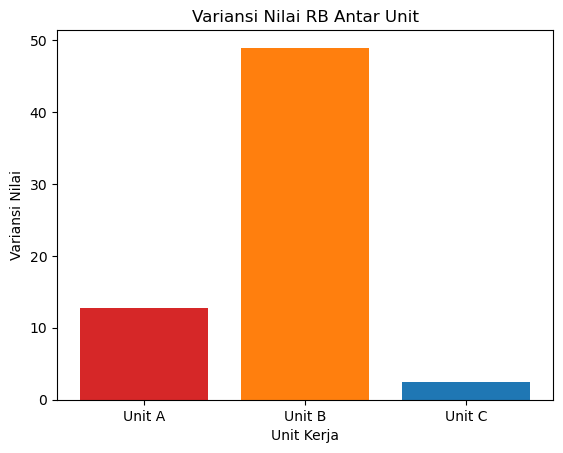

In [38]:

np.random.seed(1)
unit_scores = {
    "Unit A": np.random.normal(80, 3, 10),
    "Unit B": np.random.normal(75, 7, 10),
    "Unit C": np.random.normal(82, 2, 10)
}

variances = {k: np.var(v) for k, v in unit_scores.items()}

# Define colors for each bar
colors = ["tab:red", "tab:orange", "tab:blue"]

plt.figure()
plt.bar(variances.keys(), variances.values(), color=colors)
plt.title("Variansi Nilai RB Antar Unit")
plt.xlabel("Unit Kerja")
plt.ylabel("Variansi Nilai")
plt.show()


## 2. Boxplot Stabilitas Kinerja

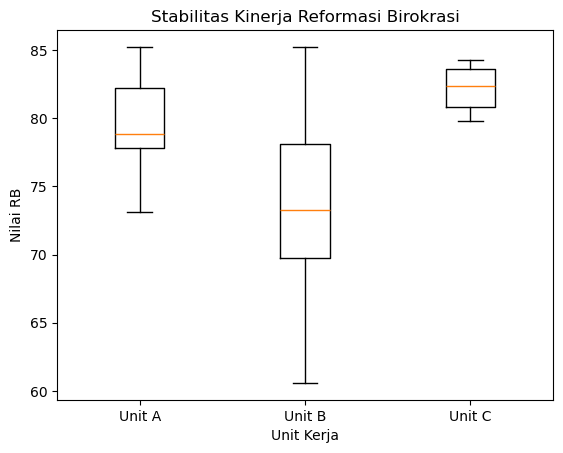

In [6]:

plt.figure()
plt.boxplot(unit_scores.values(), labels=unit_scores.keys())
plt.title("Stabilitas Kinerja Reformasi Birokrasi")
plt.xlabel("Unit Kerja")
plt.ylabel("Nilai RB")
plt.show()


## 3. Distribusi dan Standar Deviasi Nilai RB

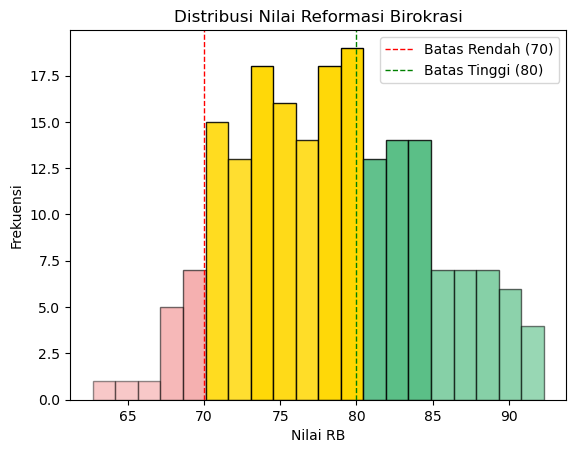

In [40]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
rb_scores = np.random.normal(78, 6, 200)

plt.figure()

counts, bins, patches = plt.hist(
    rb_scores,
    bins=20,
    edgecolor="black"
)

# Apply combined value + frequency coloring
max_count = max(counts)

for count, bin_left, patch in zip(counts, bins[:-1], patches):
    # Color by score range
    if bin_left < 70:
        patch.set_facecolor("lightcoral")        # Low RB score
    elif bin_left < 80:
        patch.set_facecolor("gold")              # Medium RB score
    else:
        patch.set_facecolor("mediumseagreen")    # High RB score

    # Transparency based on frequency
    patch.set_alpha(0.4 + 0.6 * (count / max_count))

# Optional reference lines
plt.axvline(70, color="red", linestyle="--", linewidth=1, label="Batas Rendah (70)")
plt.axvline(80, color="green", linestyle="--", linewidth=1, label="Batas Tinggi (80)")

plt.title("Distribusi Nilai Reformasi Birokrasi")
plt.xlabel("Nilai RB")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()


## 4. Korelasi Tata Kelola dan Kepuasan Publik

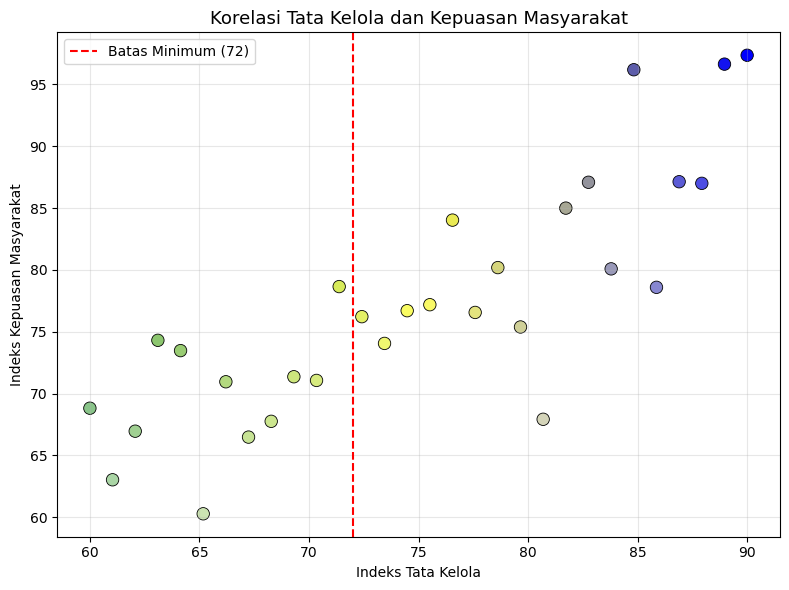

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

np.random.seed(0)

governance_index = np.linspace(60, 90, 30)
public_satisfaction = governance_index + np.random.normal(0, 5, 30)

# --- Custom colormap: green → yellow → blue (X-driven) ---
cmap = LinearSegmentedColormap.from_list(
    "g_y_b", ["green", "yellow", "blue"]
)

# Normalize X for color, Y for darkness (alpha)
norm_x = Normalize(governance_index.min(), governance_index.max())
norm_y = Normalize(public_satisfaction.min(), public_satisfaction.max())

colors = cmap(norm_x(governance_index))
colors[:, 3] = 0.3 + 0.7 * norm_y(public_satisfaction)  # darker = higher Y

plt.figure(figsize=(8, 6))

plt.scatter(
    governance_index,
    public_satisfaction,
    c=colors,
    s=80,
    edgecolor="black",
    linewidth=0.6
)

# Batas line
plt.axvline(
    72,
    color="red",
    linestyle="--",
    linewidth=1.5,
    label="Batas Minimum (72)"
)

plt.title("Korelasi Tata Kelola dan Kepuasan Masyarakat", fontsize=13)
plt.xlabel("Indeks Tata Kelola")
plt.ylabel("Indeks Kepuasan Masyarakat")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## 5. Turunan: Laju Perubahan Nilai RB

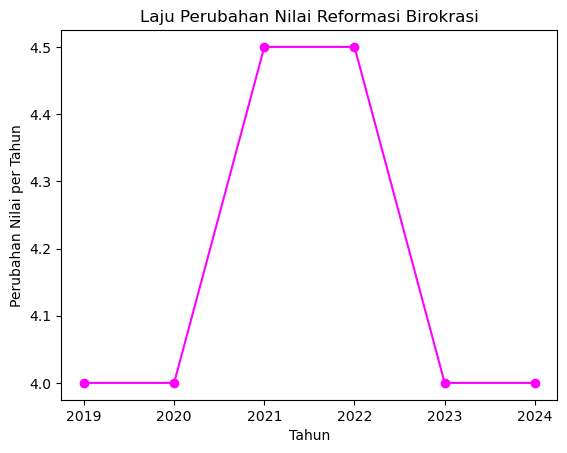

In [46]:

years = np.array([2019, 2020, 2021, 2022, 2023, 2024])
rb_values = np.array([62, 66, 70, 75, 79, 83])

rate_of_change = np.gradient(rb_values, years)

plt.figure()
plt.plot(years, rate_of_change, marker='o', color="magenta")
plt.title("Laju Perubahan Nilai Reformasi Birokrasi")
plt.xlabel("Tahun")
plt.ylabel("Perubahan Nilai per Tahun")
plt.show()


## 6. Integral: Akumulasi Dampak RB

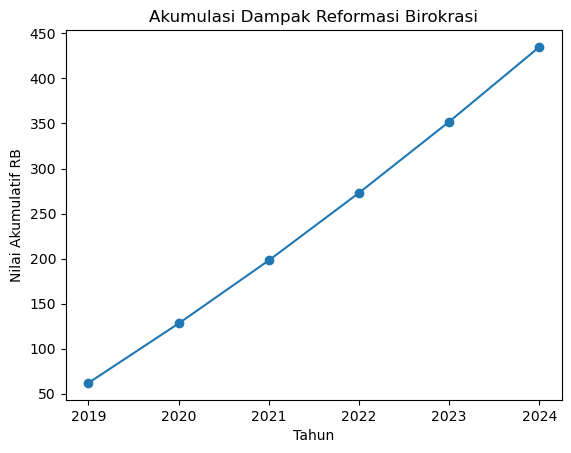

In [14]:

cumulative_impact = np.cumsum(rb_values)

plt.figure()
plt.plot(years, cumulative_impact, marker='o')
plt.title("Akumulasi Dampak Reformasi Birokrasi")
plt.xlabel("Tahun")
plt.ylabel("Nilai Akumulatif RB")
plt.show()


## 7. Sensitivitas Nilai RB

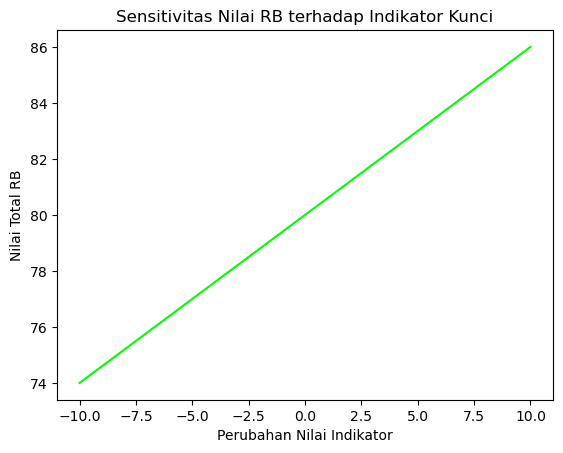

In [48]:

indicator_change = np.linspace(-10, 10, 50)
rb_total = 80 + 0.6 * indicator_change

plt.figure()
plt.plot(indicator_change, rb_total, color="lime")
plt.title("Sensitivitas Nilai RB terhadap Indikator Kunci")
plt.xlabel("Perubahan Nilai Indikator")
plt.ylabel("Nilai Total RB")
plt.show()


## 8. Variansi Berjalan

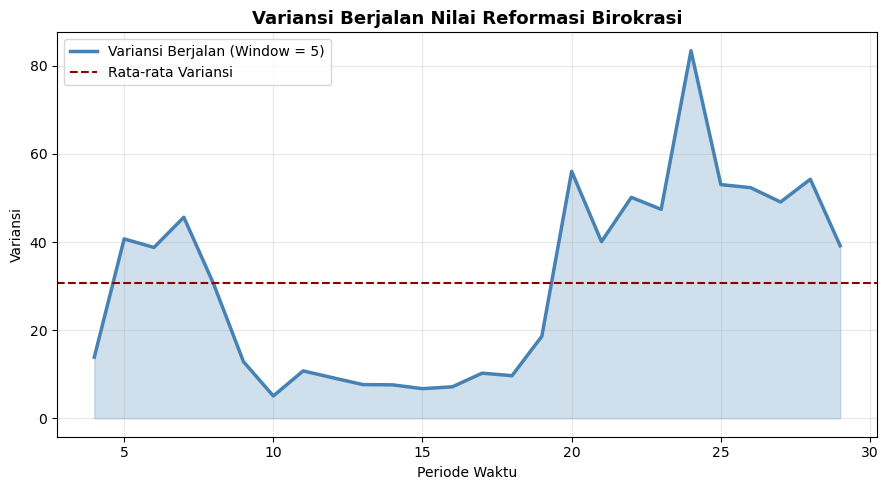

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

rb_series = pd.Series(np.random.normal(78, 5, 30))
rolling_variance = rb_series.rolling(window=5).var()

plt.figure(figsize=(9, 5))

# Main line
plt.plot(
    rolling_variance,
    linewidth=2.5,
    color="steelblue",
    label="Variansi Berjalan (Window = 5)"
)

# Soft area fill
plt.fill_between(
    rolling_variance.index,
    rolling_variance,
    alpha=0.25,
    color="steelblue"
)

# Highlight higher-than-average variance
mean_var = rolling_variance.mean()

plt.axhline(
    mean_var,
    color="darkred",
    linestyle="--",
    linewidth=1.5,
    label="Rata-rata Variansi"
)

# Styling
plt.title(
    "Variansi Berjalan Nilai Reformasi Birokrasi",
    fontsize=13,
    fontweight="bold"
)
plt.xlabel("Periode Waktu")
plt.ylabel("Variansi")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## 9. Kurva Ketimpangan (Lorenz)

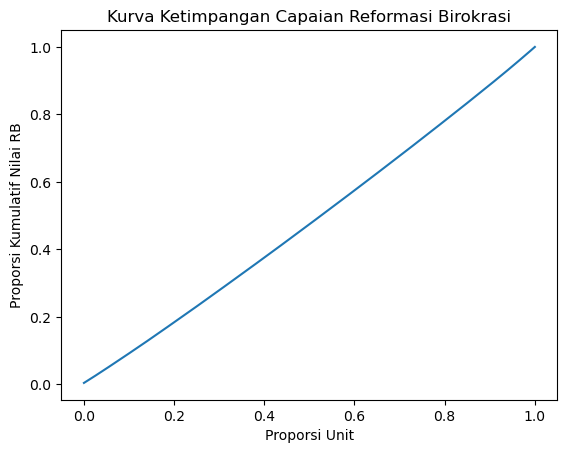

In [20]:

sorted_scores = np.sort(rb_scores)
cum_scores = np.cumsum(sorted_scores) / np.sum(sorted_scores)
population = np.linspace(0, 1, len(cum_scores))

plt.figure()
plt.plot(population, cum_scores)
plt.title("Kurva Ketimpangan Capaian Reformasi Birokrasi")
plt.xlabel("Proporsi Unit")
plt.ylabel("Proporsi Kumulatif Nilai RB")
plt.show()


## 10. Penutup Analitis